# Gaussian Processes

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dot product ~ measure of similarity
- x1 . x2 = 0 -> very dissimilar
- x1 . x2 = 1 -> very simmilar


In [11]:
x1 = [0, 1]
x2 = [1, 0]

np.dot(x1, x2)

0

In [8]:
np.dot(x1, x1)

1

## Joint distr. review

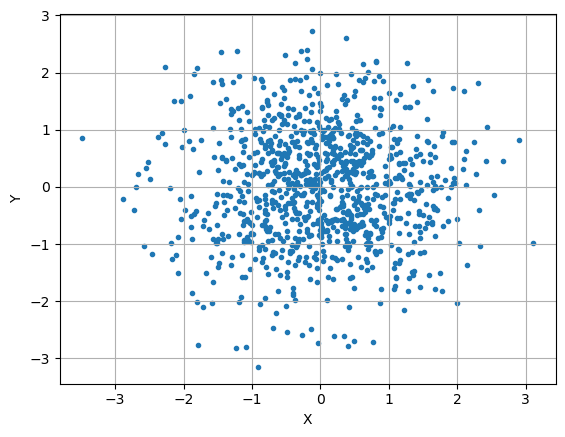

In [6]:
# Generate two uncorrelated variables with mean 0 and variance 1
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

# Plot the joint distribution in a scatterplot
plt.scatter(x, y, marker = '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


In [22]:
XY = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.7], [0.7, 1]], size=1000)
XY.shape

(1000, 2)

(array([[ 11.,  26.,  77., 145., 199., 199., 196.,  97.,  39.,  11.],
        [  6.,  31.,  61., 158., 203., 233., 162.,  95.,  42.,   9.]]),
 array([-3.08175644, -2.49013095, -1.89850547, -1.30687999, -0.71525451,
        -0.12362903,  0.46799645,  1.05962193,  1.65124741,  2.2428729 ,
         2.83449838]),
 <a list of 2 BarContainer objects>)

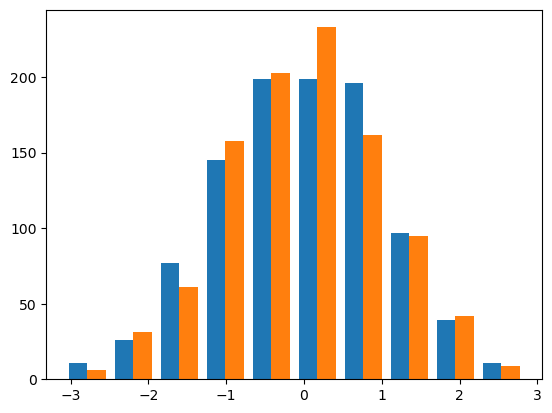

In [28]:
plt.hist(XY)

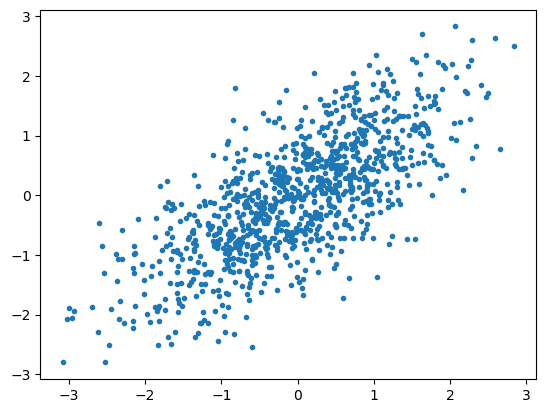

In [23]:
X = XY[:, 0]
Y = XY[:, 1]

plt.scatter(X, Y, marker = '.')

In [24]:
np.cov(X,Y)

array([[1.07667835, 0.74886392],
       [0.74886392, 0.99991995]])

## GP
- GP si essentially way to do a distribution over possible function
- $f(x) \sim GP(m(x), k(x.x'))$
- here $f$ is the true function
- Where the kernel is a way to encode our prior knowledge about the problem

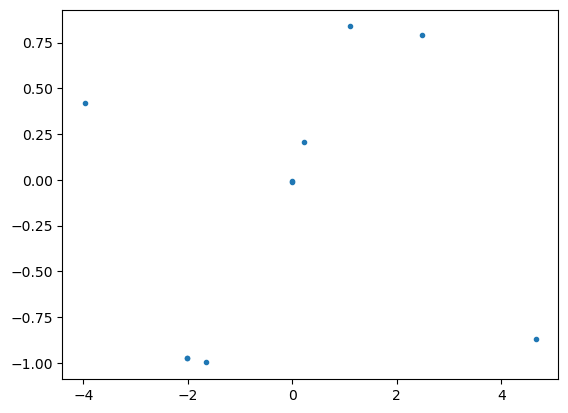

In [27]:
f = lambda x: np.sin(0.9*x).flatten()

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

plt.scatter(X, y, marker = '.')

### Kernel
- squared exponential kernel
- encodes smoothness, values x1 and x2 close, then f(x1), f(x2) close.

In [45]:
def squared_distance(a, b):
    a_squared = np.sum(a**2, axis=1).reshape(-1, 1)
    b_squared = np.sum(b**2, axis=1)
    ab_product = 2 * np.dot(a, b.T)
    return a_squared + b_squared - ab_product

def kernel(a,b, kernel_param = 0.1):
    sqdist = squared_distance(a, b)
    return np.exp(-.5 * (1/kernel_param) * sqdist)

True

In [37]:
K = kernel(X, X)
K

s

L = np.linalg.cholesky(K + s*np.eye(N))

5e-05

In [38]:


L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)


(-5.0, 5.0, -3.0, 3.0)

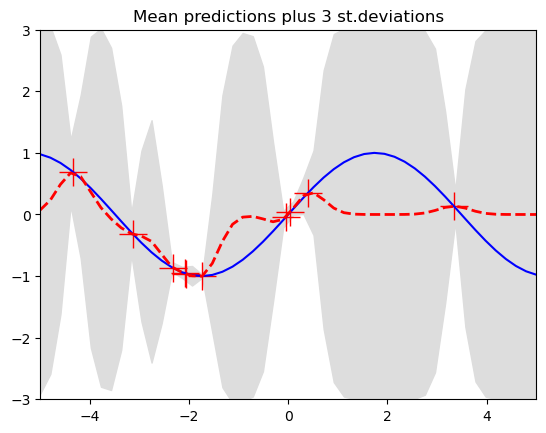

In [4]:


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])


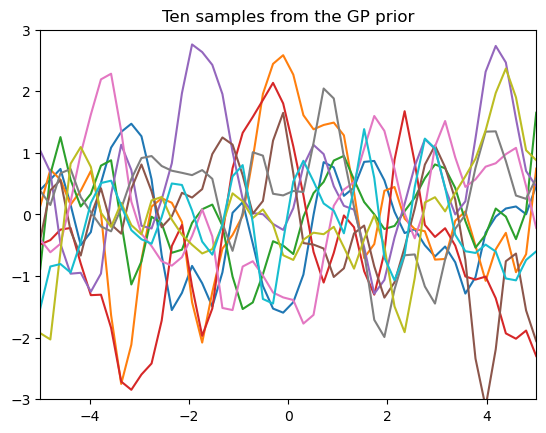

In [5]:

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')


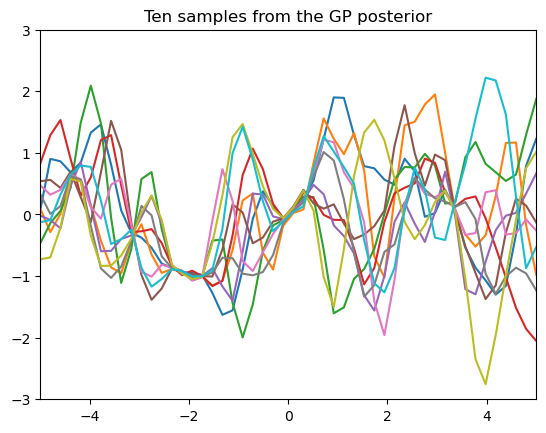

In [6]:

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()